<a href="https://colab.research.google.com/github/prashanth-ds-ml/Projects/blob/main/Seoul_Bikes_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf

In [2]:
df = pd.read_csv("seoul_train.csv")

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(ｰC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ｰC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.shape

(6336, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       6336 non-null   object 
 1   Rented Bike Count          6336 non-null   int64  
 2   Hour                       6336 non-null   int64  
 3   Temperature(ｰC)            6336 non-null   float64
 4   Humidity(%)                6336 non-null   int64  
 5   Wind speed (m/s)           6336 non-null   float64
 6   Visibility (10m)           6336 non-null   int64  
 7   Dew point temperature(ｰC)  6336 non-null   float64
 8   Solar Radiation (MJ/m2)    6336 non-null   float64
 9   Rainfall(mm)               6336 non-null   float64
 10  Snowfall (cm)              6336 non-null   float64
 11  Seasons                    6336 non-null   object 
 12  Holiday                    6336 non-null   object 
 13  Functioning Day            6336 non-null   objec

In [6]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(ｰC)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(ｰC)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df.Date)

In [8]:
df['bike_share_year'] = df['Date'].dt.year
df['bike_share_month'] = df['Date'].dt.month
df['bike_share_day'] = df['Date'].dt.day

In [9]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(ｰC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ｰC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,bike_share_year,bike_share_month,bike_share_day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


In [10]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [11]:
df.Seasons.value_counts()

Winter    1584
Spring    1584
Summer    1584
Autumn    1584
Name: Seasons, dtype: int64

In [12]:
df.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [13]:
df.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [14]:
from sklearn.preprocessing import OneHotEncoder

df['Functioning Day']=df['Functioning Day'].astype('category')
df['functioning_day']=df['Functioning Day'].cat.codes

In [15]:
df['Holiday']=df['Holiday'].astype('category')
df['holiday']=df['Holiday'].cat.codes

In [16]:
df['Seasons']=df['Seasons'].astype('category')
df['seasons']=df['Seasons'].cat.codes

In [17]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(ｰC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ｰC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,bike_share_year,bike_share_month,bike_share_day,functioning_day,holiday,seasons
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,1,1,3
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,1,1,3
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,1,1,3
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,1,1,3
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,1,1,3


In [18]:
df.drop(columns=['Date','Seasons','Holiday','Functioning Day'],inplace = True)

In [19]:
df.head()

,Rented Bike Count,Hour,Temperature(ｰC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(ｰC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),bike_share_year,bike_share_month,bike_share_day,functioning_day,holiday,seasons
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,12,1,1,1,3
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,12,1,1,1,3
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,12,1,1,1,3
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,12,1,1,1,3
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,12,1,1,1,3


In [20]:
df.shape

(6336, 16)

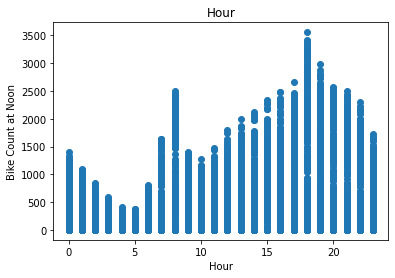

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65392 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65392 missing from current font.
  font.set_text(s, 0, flags=flags)


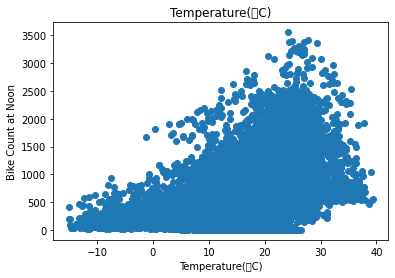

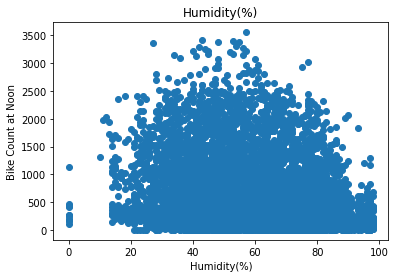

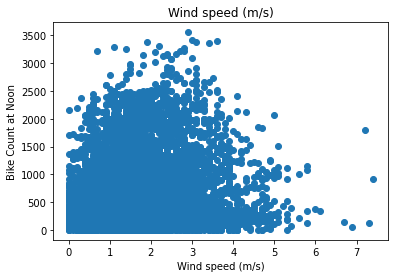

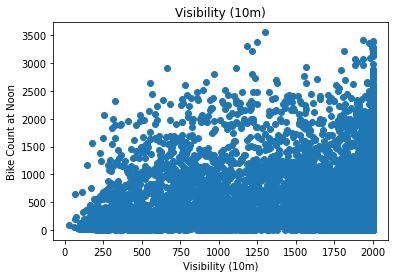

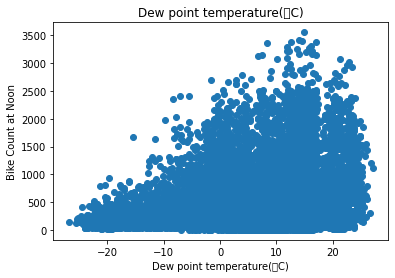

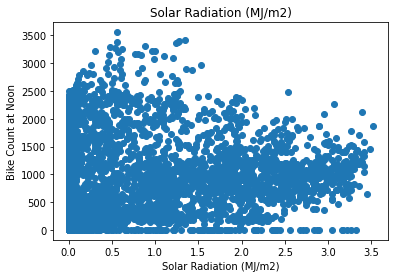

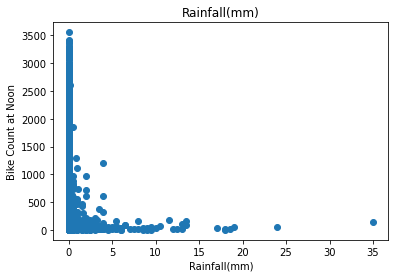

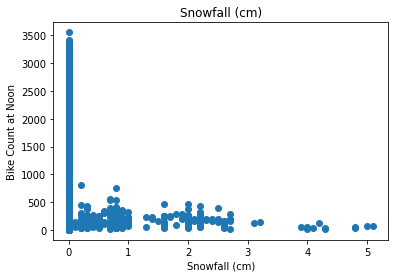

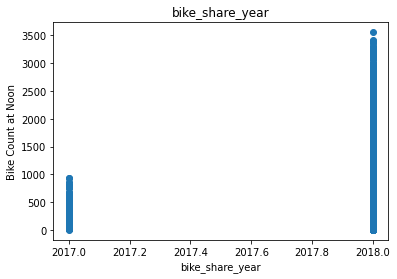

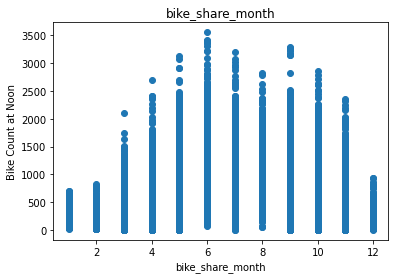

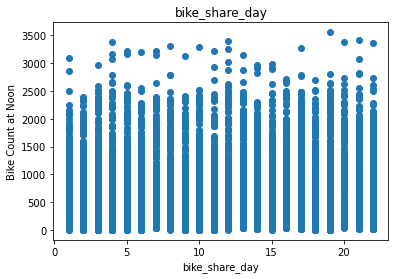

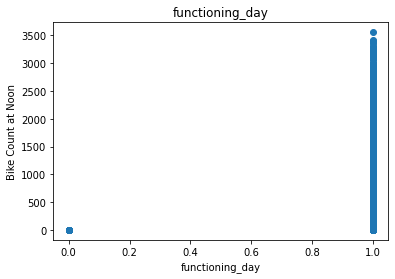

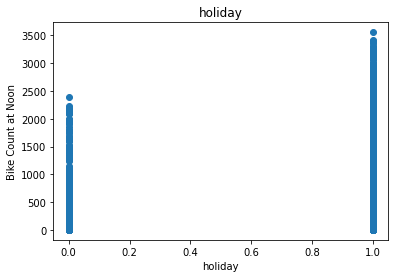

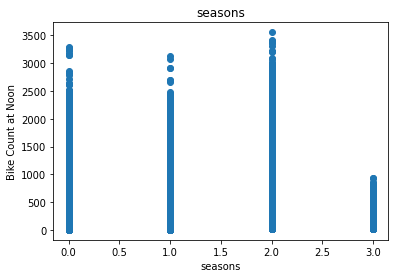

In [21]:
for label in df.columns[1:]:
    plt.scatter(df[label],df['Rented Bike Count'])
    plt.title(label)
    plt.ylabel('Bike Count at Noon')
    plt.xlabel(label)
    plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          6336 non-null   int64  
 1   Hour                       6336 non-null   int64  
 2   Temperature(ｰC)            6336 non-null   float64
 3   Humidity(%)                6336 non-null   int64  
 4   Wind speed (m/s)           6336 non-null   float64
 5   Visibility (10m)           6336 non-null   int64  
 6   Dew point temperature(ｰC)  6336 non-null   float64
 7   Solar Radiation (MJ/m2)    6336 non-null   float64
 8   Rainfall(mm)               6336 non-null   float64
 9   Snowfall (cm)              6336 non-null   float64
 10  bike_share_year            6336 non-null   int64  
 11  bike_share_month           6336 non-null   int64  
 12  bike_share_day             6336 non-null   int64  
 13  functioning_day            6336 non-null   int8 

In [23]:
df.drop(columns=['functioning_day','Visibility (10m)','Wind speed (m/s)'],axis = 1,inplace = True)

In [24]:
df.head()

,Rented Bike Count,Hour,Temperature(ｰC),Humidity(%),Dew point temperature(ｰC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),bike_share_year,bike_share_month,bike_share_day,holiday,seasons
0,254,0,-5.2,37,-17.6,0.0,0.0,0.0,2017,12,1,1,3
1,204,1,-5.5,38,-17.6,0.0,0.0,0.0,2017,12,1,1,3
2,173,2,-6.0,39,-17.7,0.0,0.0,0.0,2017,12,1,1,3
3,107,3,-6.2,40,-17.6,0.0,0.0,0.0,2017,12,1,1,3
4,78,4,-6.0,36,-18.6,0.0,0.0,0.0,2017,12,1,1,3


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6336 entries, 0 to 6335
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          6336 non-null   int64  
 1   Hour                       6336 non-null   int64  
 2   Temperature(ｰC)            6336 non-null   float64
 3   Humidity(%)                6336 non-null   int64  
 4   Dew point temperature(ｰC)  6336 non-null   float64
 5   Solar Radiation (MJ/m2)    6336 non-null   float64
 6   Rainfall(mm)               6336 non-null   float64
 7   Snowfall (cm)              6336 non-null   float64
 8   bike_share_year            6336 non-null   int64  
 9   bike_share_month           6336 non-null   int64  
 10  bike_share_day             6336 non-null   int64  
 11  holiday                    6336 non-null   int8   
 12  seasons                    6336 non-null   int8   
dtypes: float64(5), int64(6), int8(2)
memory usage: 5

In [26]:
column = df.pop('Rented Bike Count')

In [27]:
df.insert(12, 'Rented Bike Count', column)

In [28]:
df.head()

,Hour,Temperature(ｰC),Humidity(%),Dew point temperature(ｰC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),bike_share_year,bike_share_month,bike_share_day,holiday,seasons,Rented Bike Count
0,0,-5.2,37,-17.6,0.0,0.0,0.0,2017,12,1,1,3,254
1,1,-5.5,38,-17.6,0.0,0.0,0.0,2017,12,1,1,3,204
2,2,-6.0,39,-17.7,0.0,0.0,0.0,2017,12,1,1,3,173
3,3,-6.2,40,-17.6,0.0,0.0,0.0,2017,12,1,1,3,107
4,4,-6.0,36,-18.6,0.0,0.0,0.0,2017,12,1,1,3,78


In [29]:
x = df.iloc[:,0:12]
x

,Hour,Temperature(ｰC),Humidity(%),Dew point temperature(ｰC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),bike_share_year,bike_share_month,bike_share_day,holiday,seasons
0,0,-5.2,37,-17.6,0.0,0.0,0.0,2017,12,1,1,3
1,1,-5.5,38,-17.6,0.0,0.0,0.0,2017,12,1,1,3
2,2,-6.0,39,-17.7,0.0,0.0,0.0,2017,12,1,1,3
3,3,-6.2,40,-17.6,0.0,0.0,0.0,2017,12,1,1,3
4,4,-6.0,36,-18.6,0.0,0.0,0.0,2017,12,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6331,19,3.6,48,-6.4,0.0,0.0,0.0,2018,11,22,1,0
6332,20,3.1,42,-8.5,0.0,0.0,0.0,2018,11,22,1,0
6333,21,2.2,28,-14.4,0.0,0.0,0.0,2018,11,22,1,0
6334,22,1.1,33,-13.4,0.0,0.0,0.0,2018,11,22,1,0


In [30]:
y = df.iloc[:,12]
y

0        254
1        204
2        173
3        107
4         78
        ... 
6331    1032
6332     777
6333     759
6334     691
6335     488
Name: Rented Bike Count, Length: 6336, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20,random_state = 8)

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [33]:
print('r-squared: ', model.score(x_train, y_train))
print('r-squared: ', model.score(x_val, y_val))

r-squared:  0.48211226596168766
r-squared:  0.4757620236940856


In [34]:
from sklearn.ensemble import HistGradientBoostingRegressor

model_1 = HistGradientBoostingRegressor()
model_1.fit(x_train,y_train)

HistGradientBoostingRegressor()

In [35]:
print('r-squared score for train set: ', model_1.score(x_train, y_train))
print('r-squared score for validation set: ', model_1.score(x_val, y_val))

r-squared score for train set:  0.9313808444294799
r-squared score for validation set:  0.8611783709720325


In [36]:
normalizer = tf.keras.layers.Normalization(input_shape = (12,), axis = -1)
normalizer.adapt(x_train)

In [37]:
neural_net_model = tf.keras.Sequential([
    normalizer,
    #tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dense(8,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [38]:
neural_net_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 378
Trainable params: 353
Non-trainable params: 25
_________________________________________________________________


In [39]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [40]:
neural_net_model.compile( optimizer = opt, loss='mean_squared_error', metrics=[tf.keras.metrics.MeanSquaredError()])

In [41]:
hist = neural_net_model.fit(
                        x_train, y_train,batch_size = 32,
                        validation_data=(x_val, y_val),
                        epochs=80
                              )

Epoch 1/80
159/159 [==============================] - 2s 8ms/step - loss: 921715.5625 - mean_squared_error: 921715.5625 - val_loss: 920953.9375 - val_mean_squared_error: 920953.9375
Epoch 2/80
159/159 [==============================] - 1s 5ms/step - loss: 890723.1250 - mean_squared_error: 890723.1250 - val_loss: 859238.4375 - val_mean_squared_error: 859238.4375
Epoch 3/80
159/159 [==============================] - 1s 6ms/step - loss: 779267.6250 - mean_squared_error: 779267.6250 - val_loss: 690651.0625 - val_mean_squared_error: 690651.0625
Epoch 4/80
159/159 [==============================] - 1s 5ms/step - loss: 574148.1875 - mean_squared_error: 574148.1875 - val_loss: 467428.2812 - val_mean_squared_error: 467428.2812
Epoch 5/80
159/159 [==============================] - 1s 4ms/step - loss: 378540.3438 - mean_squared_error: 378540.3438 - val_loss: 320109.3125 - val_mean_squared_error: 320109.3125
Epoch 6/80
159/159 [==============================] - 1s 5ms/step - loss: 281929.2812 - me

In [42]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

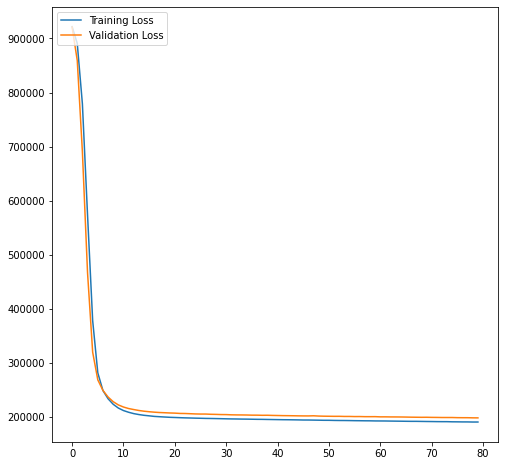

In [43]:
plt.figure(figsize=(8,8))
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.legend(loc="upper left")
plt.show()

In [44]:
test_df = pd.read_csv('seoul_test.csv')

In [57]:
test_df.head()

,Hour,Temperature(ｰC),Humidity(%),Dew point temperature(ｰC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),bike_share_year,bike_share_month,bike_share_day,holiday,seasons
0,0,5.8,75,1.7,0.0,0.0,0.0,2017,12,23,1,3
1,1,5.7,75,1.6,0.0,0.0,0.0,2017,12,23,1,3
2,2,5.6,76,1.6,0.0,0.0,0.0,2017,12,23,1,3
3,3,5.4,77,1.6,0.0,0.0,0.0,2017,12,23,1,3
4,4,5.3,79,1.9,0.0,0.0,0.0,2017,12,23,1,3


In [46]:
test_df['Date'] = pd.to_datetime(test_df.Date)

In [47]:
test_df['bike_share_year'] = test_df['Date'].dt.year
test_df['bike_share_month'] = test_df['Date'].dt.month
test_df['bike_share_day'] = test_df['Date'].dt.day

In [48]:
test_df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [49]:
test_df.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [50]:
test_df['Functioning Day']=test_df['Functioning Day'].astype('category')
test_df['functioning_day']=test_df['Functioning Day'].cat.codes

In [51]:
test_df['Holiday']=test_df['Holiday'].astype('category')
test_df['holiday']=test_df['Holiday'].cat.codes

In [52]:
test_df['Seasons']=test_df['Seasons'].astype('category')
test_df['seasons']=test_df['Seasons'].cat.codes

In [53]:
test_df.drop(columns=['Date','Seasons','Holiday','Functioning Day','functioning_day','Visibility (10m)','Wind speed (m/s)'],inplace = True)

In [54]:
test_df.head()

,Hour,Temperature(ｰC),Humidity(%),Dew point temperature(ｰC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),bike_share_year,bike_share_month,bike_share_day,holiday,seasons
0,0,5.8,75,1.7,0.0,0.0,0.0,2017,12,23,1,3
1,1,5.7,75,1.6,0.0,0.0,0.0,2017,12,23,1,3
2,2,5.6,76,1.6,0.0,0.0,0.0,2017,12,23,1,3
3,3,5.4,77,1.6,0.0,0.0,0.0,2017,12,23,1,3
4,4,5.3,79,1.9,0.0,0.0,0.0,2017,12,23,1,3


In [55]:
y_pred_neural_net = neural_net_model.predict(test_df)

54/54 [==============================] - 0s 1ms/step


In [56]:
y_pred_neural_net

array([[ 190.88437],
       [ 196.34122],
       [ 200.5901 ],
       ...,
       [1195.8363 ],
       [1179.8083 ],
       [1222.7548 ]], dtype=float32)